In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
data= pd.read_csv('Attrition data.csv')

In [70]:
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


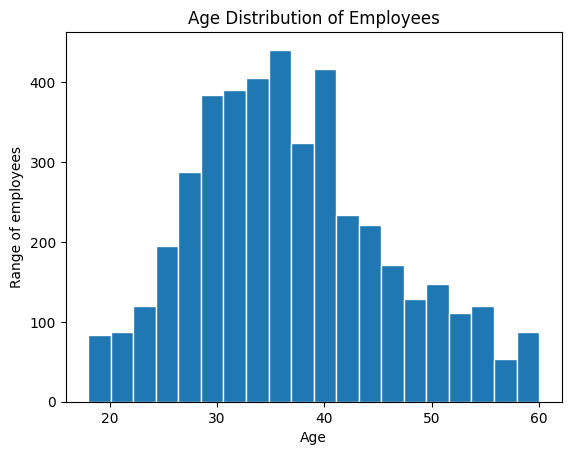

In [71]:
#AGE DISTRIBUTION OF EMPLOYEES
plt.hist(data['Age'],edgecolor='white',bins=20)
plt.xlabel("Age")
plt.ylabel("Range of employees")
plt.title("Age Distribution of Employees")
plt.show()

In [72]:
data['Age'].value_counts()

Age
35    234
34    231
31    207
36    207
29    204
32    183
30    180
33    174
38    174
40    171
37    150
27    144
28    144
42    138
39    126
45    123
41    120
26    117
46     99
44     99
43     96
50     90
25     78
24     78
47     72
49     72
55     66
51     57
48     57
53     57
54     54
52     54
22     48
58     42
23     42
56     42
21     39
20     33
59     30
19     27
18     24
60     15
57     12
Name: count, dtype: int64

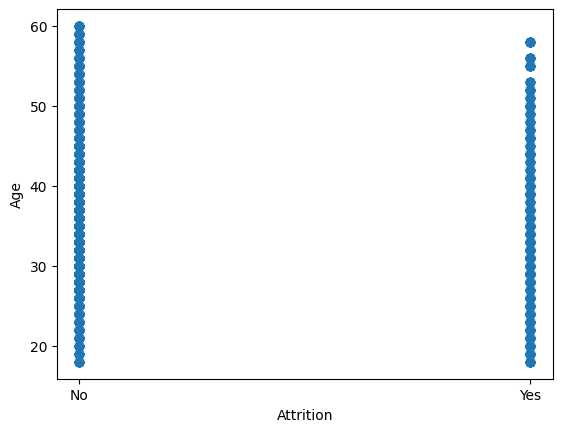

In [73]:
#EXPLORE ATTRITION BY AGE
plt.scatter(data.Attrition,data.Age)
plt.ylabel("Age")
plt.xlabel("Attrition")
plt.show()

In [74]:
df=pd.DataFrame(data['Attrition'].value_counts())

In [75]:
df=df.reset_index()

In [76]:
df

,Attrition,count
0,No,3699
1,Yes,711


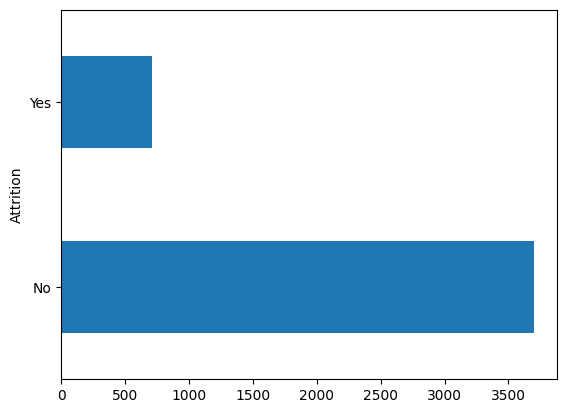

In [77]:
#using bar to show attrition
data['Attrition'].value_counts().plot(kind='barh')
plt.show()

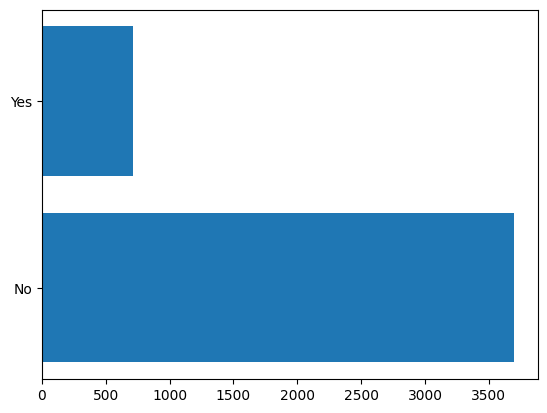

In [78]:
plt.barh(df['Attrition'],df['count'])
plt.show()

In [79]:
#distribution of employees by eduction field
data['EducationField'].value_counts()

EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: count, dtype: int64

In [80]:
#representing marital status using bar charty
df2=pd.DataFrame(data['MaritalStatus'].value_counts())

In [81]:
df2=df2.reset_index()

In [82]:
df2

,MaritalStatus,count
0,Married,2019
1,Single,1410
2,Divorced,981


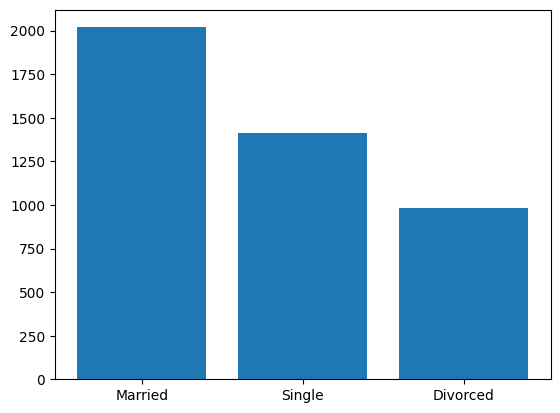

In [83]:
plt.bar(df2['MaritalStatus'],df2['count'])
plt.show()

In [84]:
#representing marital status using bar charty
df3=pd.DataFrame(data['BusinessTravel'].value_counts())

In [85]:
df3=df3.reset_index()

In [86]:
df3

,BusinessTravel,count
0,Travel_Rarely,3129
1,Travel_Frequently,831
2,Non-Travel,450


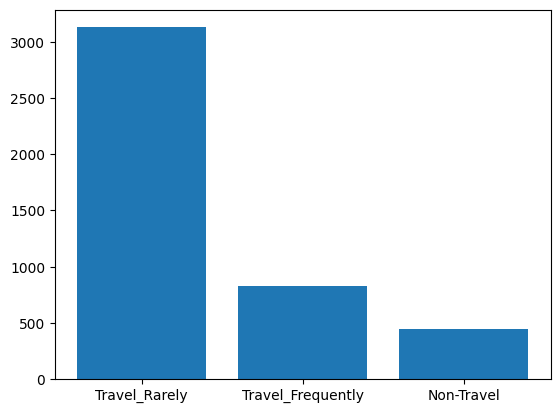

In [87]:
plt.bar(df3['BusinessTravel'],df3['count'])
plt.show()

In [88]:
df4=pd.DataFrame(data['JobRole'].value_counts())

In [89]:
df4=df4.reset_index()

In [90]:
df4

,JobRole,count
0,Sales Executive,978
1,Research Scientist,876
2,Laboratory Technician,777
3,Manufacturing Director,435
4,Healthcare Representative,393
5,Manager,306
6,Sales Representative,249
7,Research Director,240
8,Human Resources,156


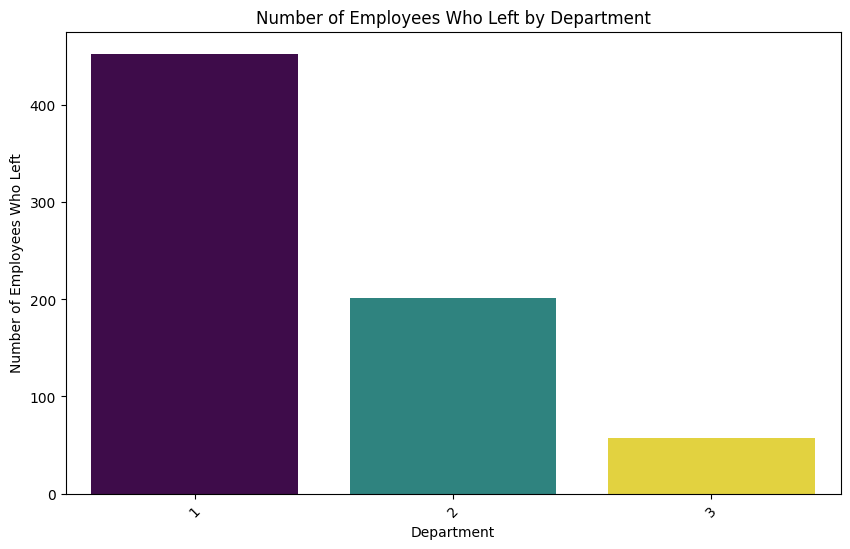

In [253]:
# Visualize attrition by department
import matplotlib.pyplot as plt
import seaborn as sns

attrition_by_department = data[data['Attrition'] == 1]['Department'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_by_department.index, y=attrition_by_department.values, hue=attrition_by_department.index, palette='viridis', dodge=False, legend=False)
plt.title('Number of Employees Who Left by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45)
plt.show()

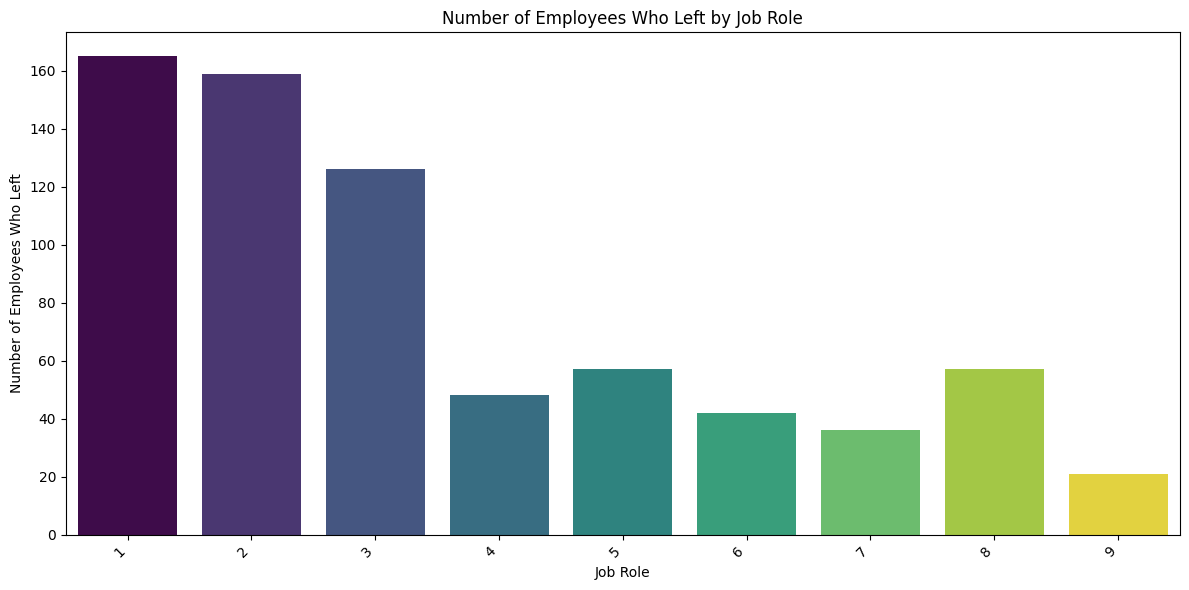

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and it contains 'JobRole' and 'Attrition' columns
# Calculate the number of employees who left in each job role
attrition_by_job_role = data[data['Attrition'] == 1]['JobRole'].value_counts()

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=attrition_by_job_role.index, y=attrition_by_job_role.values, hue=attrition_by_job_role.index, palette='viridis', dodge=False, legend=False)
plt.title('Number of Employees Who Left by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [91]:
#BUILDING A LOGISTIC REGRESSION MODEL TO PREDICT WHICH EMPLOYEES ARE LIKELY FOR ATTRITION
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [93]:
    print(data['Attrition'].head())  # Before replacement
    data['Attrition'] = data['Attrition'].replace({'Yes': 1, 'No': 0})
    print(data['Attrition'].head())  # After replacement

0     No
1    Yes
2     No
3     No
4     No
Name: Attrition, dtype: object
0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: object


In [101]:
    print(data['EducationField'].head())  # Before replacement
    data['EducationField'] = data['EducationField'].replace({
        'Life Sciences': 1, 
        'Medical': 2, 
        'Marketing': 3,
        'Technical Degree': 4, 
        'Other': 5, 
        'Human Resources': 6
    })
    print(data['EducationField'].head())  # After replacement

0    1
1    1
2    5
3    1
4    2
Name: EducationField, dtype: object
0    1
1    1
2    5
3    1
4    2
Name: EducationField, dtype: object


In [102]:
data['Department'] = data['Department'].replace({
    'Research & Development': 1, 
    'Sales': 2, 
    'Human Resources': 3
}).infer_objects(copy=False)
print(data['Department'].unique())

[2 1 3]


In [105]:
data['MaritalStatus'] = data['MaritalStatus'].replace({
    'Married': 1, 
    'Single': 2, 
    'Divorced': 3
}).infer_objects(copy=False)
print(data['Department'])

0       2
1       1
2       1
3       1
4       1
       ..
4405    1
4406    1
4407    1
4408    2
4409    1
Name: Department, Length: 4410, dtype: int64


In [106]:

# Set the option to suppress the warning
pd.set_option('future.no_silent_downcasting', True)

# Your existing code
data['BusinessTravel'] = data['BusinessTravel'].replace({
    'Travel_Rarely': 1, 
    'Travel_Frequently': 2, 
    'Non-Travel': 3
}).infer_objects(copy=False)
print(data['BusinessTravel'])

0       1
1       2
2       2
3       3
4       1
       ..
4405    1
4406    1
4407    1
4408    1
4409    1
Name: BusinessTravel, Length: 4410, dtype: int64


In [110]:
data['Gender'] = data['Gender'].replace({
    'Female': 1, 
    'Male': 2
}).infer_objects(copy=False)
print(data['Gender'])

0       1
1       1
2       2
3       2
4       2
       ..
4405    1
4406    2
4407    2
4408    2
4409    2
Name: Gender, Length: 4410, dtype: int64


In [111]:
data['Over18'] = data['Over18'].replace({
    'Y': 1
}).infer_objects(copy=False)

In [112]:
data['JobRole'] = data['JobRole'].replace({
    'Sales Executive': 1, 
    'Research Scientist': 2, 
    'Laboratory Technician': 3,
    'Manufacturing Director': 4, 
    'Healthcare Representative': 5, 
    'Manager': 6,
    'Sales Representative': 7,
    'Research Director': 8,
    'Human Resources': 9
}).infer_objects(copy=False)

In [113]:
X = data.drop(['Attrition'],axis=1)
X.head()

,EmployeeID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,1,2,6,2,1,1,1,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,2,1,10,1,1,1,1,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,2,1,17,4,5,1,2,4,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,3,1,2,5,1,1,2,3,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,1,1,10,1,2,1,2,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [117]:
y = data[['Attrition']]
y.head()

,Attrition
0,0
1,1
2,0
3,0
4,0


In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=5)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3307, 28) (1103, 28) (3307, 1) (1103, 1)


In [119]:
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN with the mean (or other strategy)
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'

# Fit the imputer on X_train and transform X_train
X_train = imputer.fit_transform(X_train)

# Apply the same transformation to X_test if needed
X_test = imputer.transform(X_test)

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Ensure 'Attrition' column is correctly encoded
data['Attrition'] = data['Attrition'].replace({'Yes': 1, 'No': 0})

# Split the data into features and target
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

# Handle missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ensure y_train is a 1D array of integers
y_train = y_train.values.ravel().astype(int)

# Fit the Logistic Regression model with increased max_iter
lr = LogisticRegression(max_iter=200)  # Increase max_iter as needed
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [187]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# ... existing code ...

# Fit the Logistic Regression model
lr.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

# Optionally, you can refit the model with the best parameters
best_lr = grid_search.best_estimator_
best_lr.fit(X_train, y_train)

# ... continue with predictions and further analysis ...
# Cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

# Optionally, you can refit the model with the best parameters
best_lr = grid_search.best_estimator_
best_lr.fit(X_train, y_train)

Cross-validation scores: [0.82930514 0.83383686 0.83509834 0.83509834 0.83509834]
Mean CV score: 0.8336874003044003
Best parameters found by GridSearchCV: {'C': 0.1, 'max_iter': 100}
Cross-validation scores: [0.82930514 0.83383686 0.83509834 0.83509834 0.83509834]
Mean CV score: 0.8336874003044003
Best parameters found by GridSearchCV: {'C': 0.1, 'max_iter': 100}


LogisticRegression(C=0.1)

In [134]:
y_predicted = lr.predict(X_test)

In [135]:
print(y_predicted)

[0 0 0 ... 0 0 0]


In [136]:
y_predicted_prob = lr.predict_proba(X_test)

In [137]:
print(y_predicted_prob)

[[0.76471734 0.23528266]
 [0.90855235 0.09144765]
 [0.83602706 0.16397294]
 ...
 [0.83667294 0.16332706]
 [0.92072985 0.07927015]
 [0.96560642 0.03439358]]


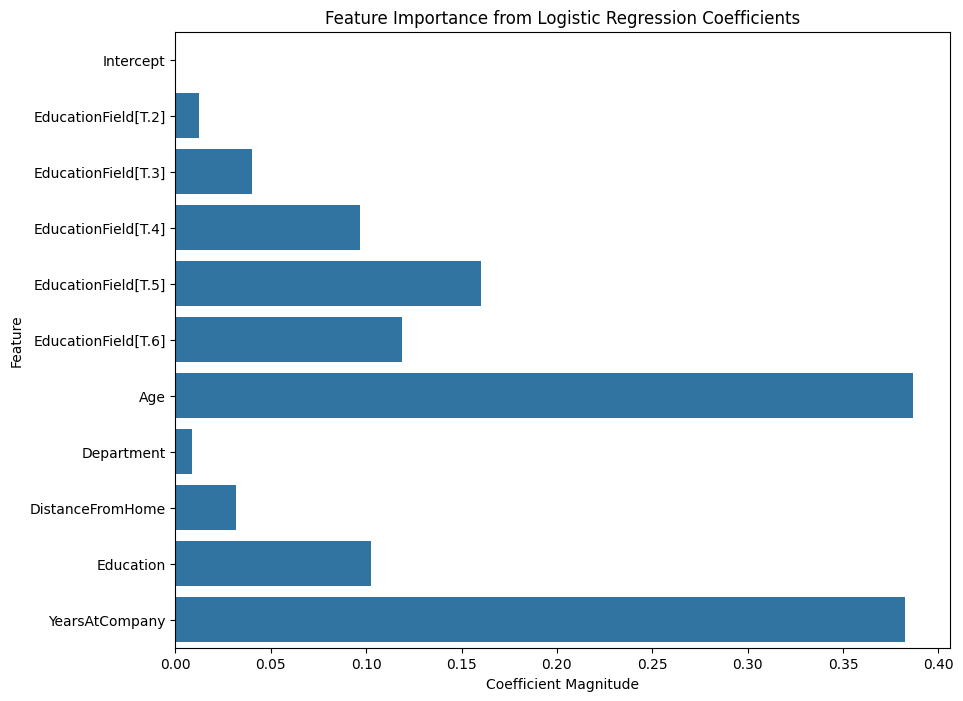

In [199]:
# Import necessary library for plotting
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Feature importance
# Assuming X is your DataFrame with feature names
feature_importance = np.abs(lr.coef_[0])
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()

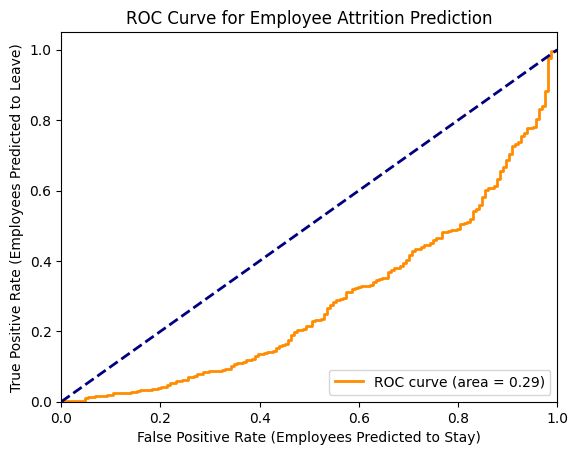

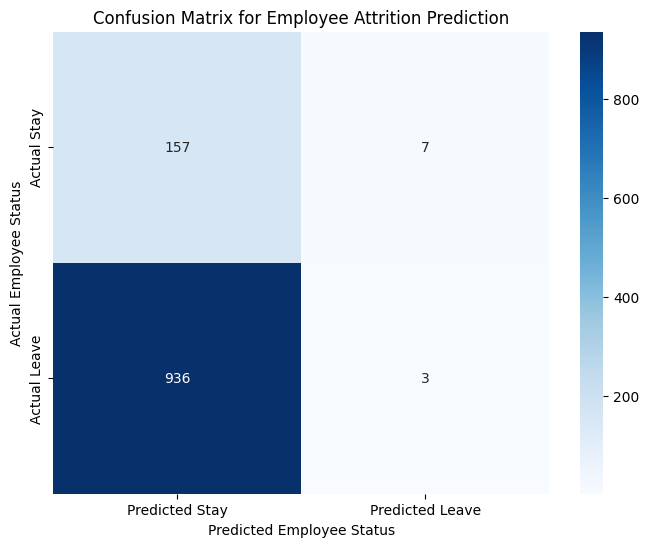

In [249]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plot ROC curve to evaluate model's ability to predict employee attrition
fpr, tpr, _ = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Employees Predicted to Stay)')
plt.ylabel('True Positive Rate (Employees Predicted to Leave)')
plt.title('ROC Curve for Employee Attrition Prediction')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix to visualize prediction accuracy for employee attrition
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Stay', 'Predicted Leave'], yticklabels=['Actual Stay', 'Actual Leave'])
plt.ylabel('Actual Employee Status')
plt.xlabel('Predicted Employee Status')
plt.title('Confusion Matrix for Employee Attrition Prediction')
plt.show()

In [201]:
import numpy as np
from sklearn import metrics

# Convert to numpy arrays and ensure they are 1D
y_test = np.array(y_test).ravel()
y_predicted = np.array(y_predicted).ravel()

# Check the unique values in both arrays
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_predicted:", np.unique(y_predicted))

# Convert to integer type if necessary
y_test = y_test.astype(int)
y_predicted = y_predicted.astype(int)

# Ensure both arrays have the same length
assert len(y_test) == len(y_predicted), "y_test and y_predicted must have the same length"

# Now calculate the accuracy score
print(metrics.accuracy_score(y_test, y_predicted))

Unique values in y_test: [0 1]
Unique values in y_predicted: [0 1]
0.14505893019038985


In [202]:
print (metrics.roc_auc_score(y_test, y_predicted_prob[:, 1]))

0.2855593651783163


In [203]:
from sklearn.metrics import classification_report, precision_score, confusion_matrix

# Assuming y_true = y_test and y_pred = y_predicted
y_true = y_test
y_pred = y_predicted

# Set zero_division to 1 or 0 to handle undefined precision
print(classification_report(y_true, y_pred, zero_division=1))
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.96      0.25       164
           1       0.30      0.00      0.01       939

    accuracy                           0.15      1103
   macro avg       0.22      0.48      0.13      1103
weighted avg       0.28      0.15      0.04      1103

[[157   7]
 [936   3]]


In [204]:
print(X_train)

[[ 0.          1.4519238  -0.33796202 ...  2.06484698  1.06398949
   2.16136363]
 [ 0.         -0.68874138 -0.33796202 ... -0.03389707  1.06398949
   1.33255687]
 [ 0.         -0.68874138  2.95891234 ...  2.43521357  1.06398949
  -0.82234072]
 ...
 [ 0.         -0.68874138 -0.33796202 ...  0.58338059  0.08984407
  -0.49081801]
 [ 0.         -0.68874138 -0.33796202 ... -0.5277192   0.08984407
  -0.32505666]
 [ 0.         -0.68874138 -0.33796202 ...  0.21301399 -0.88430134
   0.00646605]]


In [228]:
# Assuming these are the features used in training
# Adjust this list to match the features actually used in your model
feature_names = [
    'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
    'Education', 'EducationField', 'Gender', 'HourlyRate', 'JobLevel',
    'JobRole', 'MaritalStatus'  # Add any missing features here
]

# Create a new input with the correct number of features
# Adjust the values to match the order and type of your training features
kk = [[40, 1, 2, 10, 3, 5, 1, 30, 2, 3, 1]]  # Example values, ensure it has 11 features

# Apply the same preprocessing to kk
kk_preprocessed = scaler.transform(kk)

# Predict probabilities
print(lr.predict_proba(kk_preprocessed))

[[0.01621327 0.98378673]]


In [215]:

from patsy import dmatrices

In [229]:
y,X = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  data, return_type="dataframe")

In [230]:
y

,Attrition[0],Attrition[1]
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
4405,1.0,0.0
4406,1.0,0.0
4407,1.0,0.0
4408,1.0,0.0


In [231]:
X

,Intercept,EducationField[T.2],EducationField[T.3],EducationField[T.4],EducationField[T.5],EducationField[T.6],Age,Department,DistanceFromHome,Education,YearsAtCompany
0,1.0,0.0,0.0,0.0,0.0,0.0,51.0,2.0,6.0,2.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,31.0,1.0,10.0,1.0,5.0
2,1.0,0.0,0.0,0.0,1.0,0.0,32.0,1.0,17.0,4.0,5.0
3,1.0,0.0,0.0,0.0,0.0,0.0,38.0,1.0,2.0,5.0,8.0
4,1.0,1.0,0.0,0.0,0.0,0.0,32.0,1.0,10.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
4405,1.0,1.0,0.0,0.0,0.0,0.0,42.0,1.0,5.0,4.0,3.0
4406,1.0,1.0,0.0,0.0,0.0,0.0,29.0,1.0,2.0,4.0,3.0
4407,1.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0,25.0,2.0,4.0
4408,1.0,1.0,0.0,0.0,0.0,0.0,42.0,2.0,18.0,2.0,9.0


In [239]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Check if y is a DataFrame or Series
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]  # Select the first column if y is a DataFrame

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the Logistic Regression model with increased max_iter
model2 = LogisticRegression(max_iter=500, solver='lbfgs')  # Increase max_iter as needed
model2.fit(X_train, y_train)

# Predict probabilities
probs = model2.predict_proba(X_test)
print(probs)

[[0.18372452 0.81627548]
 [0.17811303 0.82188697]
 [0.12622937 0.87377063]
 ...
 [0.18063301 0.81936699]
 [0.12405806 0.87594194]
 [0.13748308 0.86251692]]


In [240]:
# Ensure y is a 1D array
# y = y.to_numpy()  # This line is not needed if y is already a numpy array

# Fit the model
model2 = LogisticRegression()
model2.fit(X_train, y_train)

# Predict using the fitted model
predicted = model2.predict(X_test)
print(predicted)

[1. 1. 1. ... 1. 1. 1.]


In [241]:
probs = model2.predict_proba(X_test)
print (probs)

[[0.18372452 0.81627548]
 [0.17811303 0.82188697]
 [0.12622937 0.87377063]
 ...
 [0.18063301 0.81936699]
 [0.12405806 0.87594194]
 [0.13748308 0.86251692]]


In [242]:
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8522212148685403
0.648218135535988


In [243]:
X_train

array([[ 0.        ,  1.4519238 , -0.33796202, ...,  2.06484698,
         1.06398949,  2.16136363],
       [ 0.        , -0.68874138, -0.33796202, ..., -0.03389707,
         1.06398949,  1.33255687],
       [ 0.        , -0.68874138,  2.95891234, ...,  2.43521357,
         1.06398949, -0.82234072],
       ...,
       [ 0.        , -0.68874138, -0.33796202, ...,  0.58338059,
         0.08984407, -0.49081801],
       [ 0.        , -0.68874138, -0.33796202, ..., -0.5277192 ,
         0.08984407, -0.32505666],
       [ 0.        , -0.68874138, -0.33796202, ...,  0.21301399,
        -0.88430134,  0.00646605]])

In [244]:
# Assuming you have a list of feature names in the same order as your training data
feature_names = [
    'Intercept', 'EducationField[T.2]', 'EducationField[T.3]', 
    'EducationField[T.4]', 'EducationField[T.5]', 'EducationField[T.6]', 
    'Age', 'Department', 'DistanceFromHome', 'Education', 'YearsAtCompany'
]

# Add random values to kk according to the parameters mentioned above
kk = [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.0, 1.0, 500.0, 3.0, 24.0]]

# Ensure kk is a numpy array and has the correct shape
kk = np.array(kk)

# Predict probabilities
print(model2.predict_proba(kk))

[[2.22044605e-16 1.00000000e+00]]


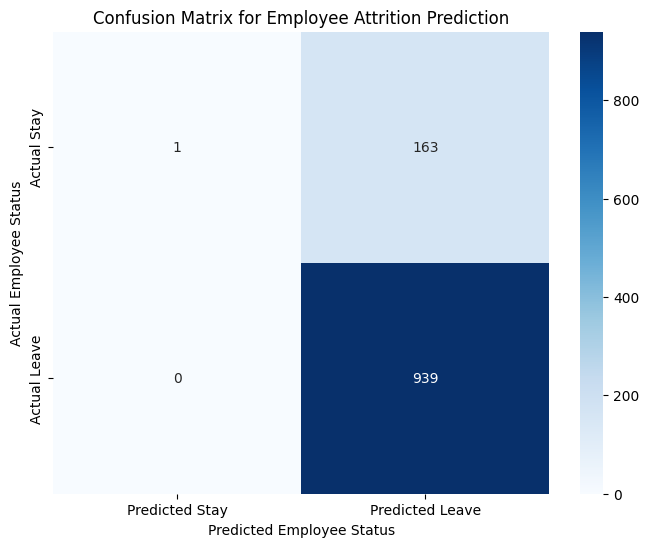

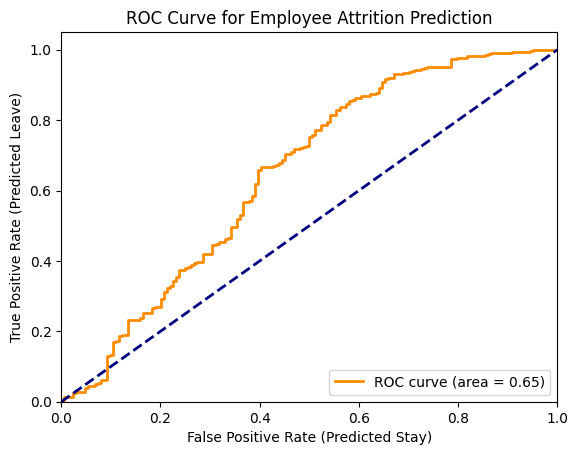

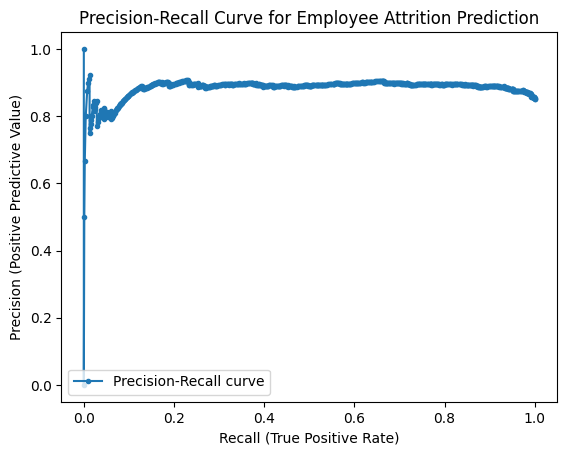

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, confusion_matrix

# Assuming you have already defined y_pred and y_pred_prob
y_pred = model2.predict(X_test)
y_pred_prob = model2.predict_proba(X_test)[:, 1]

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Stay', 'Predicted Leave'], yticklabels=['Actual Stay', 'Actual Leave'])
plt.ylabel('Actual Employee Status')
plt.xlabel('Predicted Employee Status')
plt.title('Confusion Matrix for Employee Attrition Prediction')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Predicted Stay)')
plt.ylabel('True Positive Rate (Predicted Leave)')
plt.title('ROC Curve for Employee Attrition Prediction')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall (True Positive Rate)')
plt.ylabel('Precision (Positive Predictive Value)')
plt.title('Precision-Recall Curve for Employee Attrition Prediction')
plt.legend(loc="lower left")
plt.show()